In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("/home/new/Downloads/steam-200k.csv"))
import os
import pandas as pd


# Any results you write to the current directory are saved as output.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
#import the data, specify data types
import pandas as pd

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import xgboost

import pickle 
#import mglearn
import time


import nltk
from nltk.tokenize import TweetTokenizer # doesn't split at apostrophes
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [4]:
df = pd.read_csv(r'H:\Data Analytics Assignment 2\all\train1.csv')



In [5]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.drop('Serial No.', axis = 1, inplace = True)

In [7]:
print(f'Dataset contains {df.shape[0]} samples, {df.shape[1] - 1} independent features 1 target continuous variable.')

Dataset contains 500 samples, 7 independent features 1 target continuous variable.


In [8]:
print(df.info())

missing_values = (df.isnull().sum() / len(df)) * 100
print("\nFeatures with missing values: \n", missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB
None

Features with missing values: 
 Series([], dtype: float64)


In [9]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


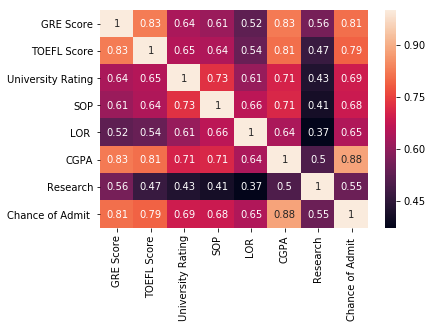

In [10]:
sns.heatmap(df.corr(), annot = True)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import xgboost
%matplotlib inline

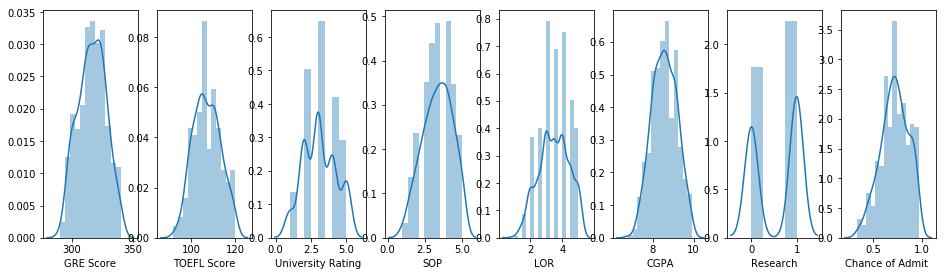

In [12]:
l = df.columns.values
number_of_columns=df.shape[1]
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

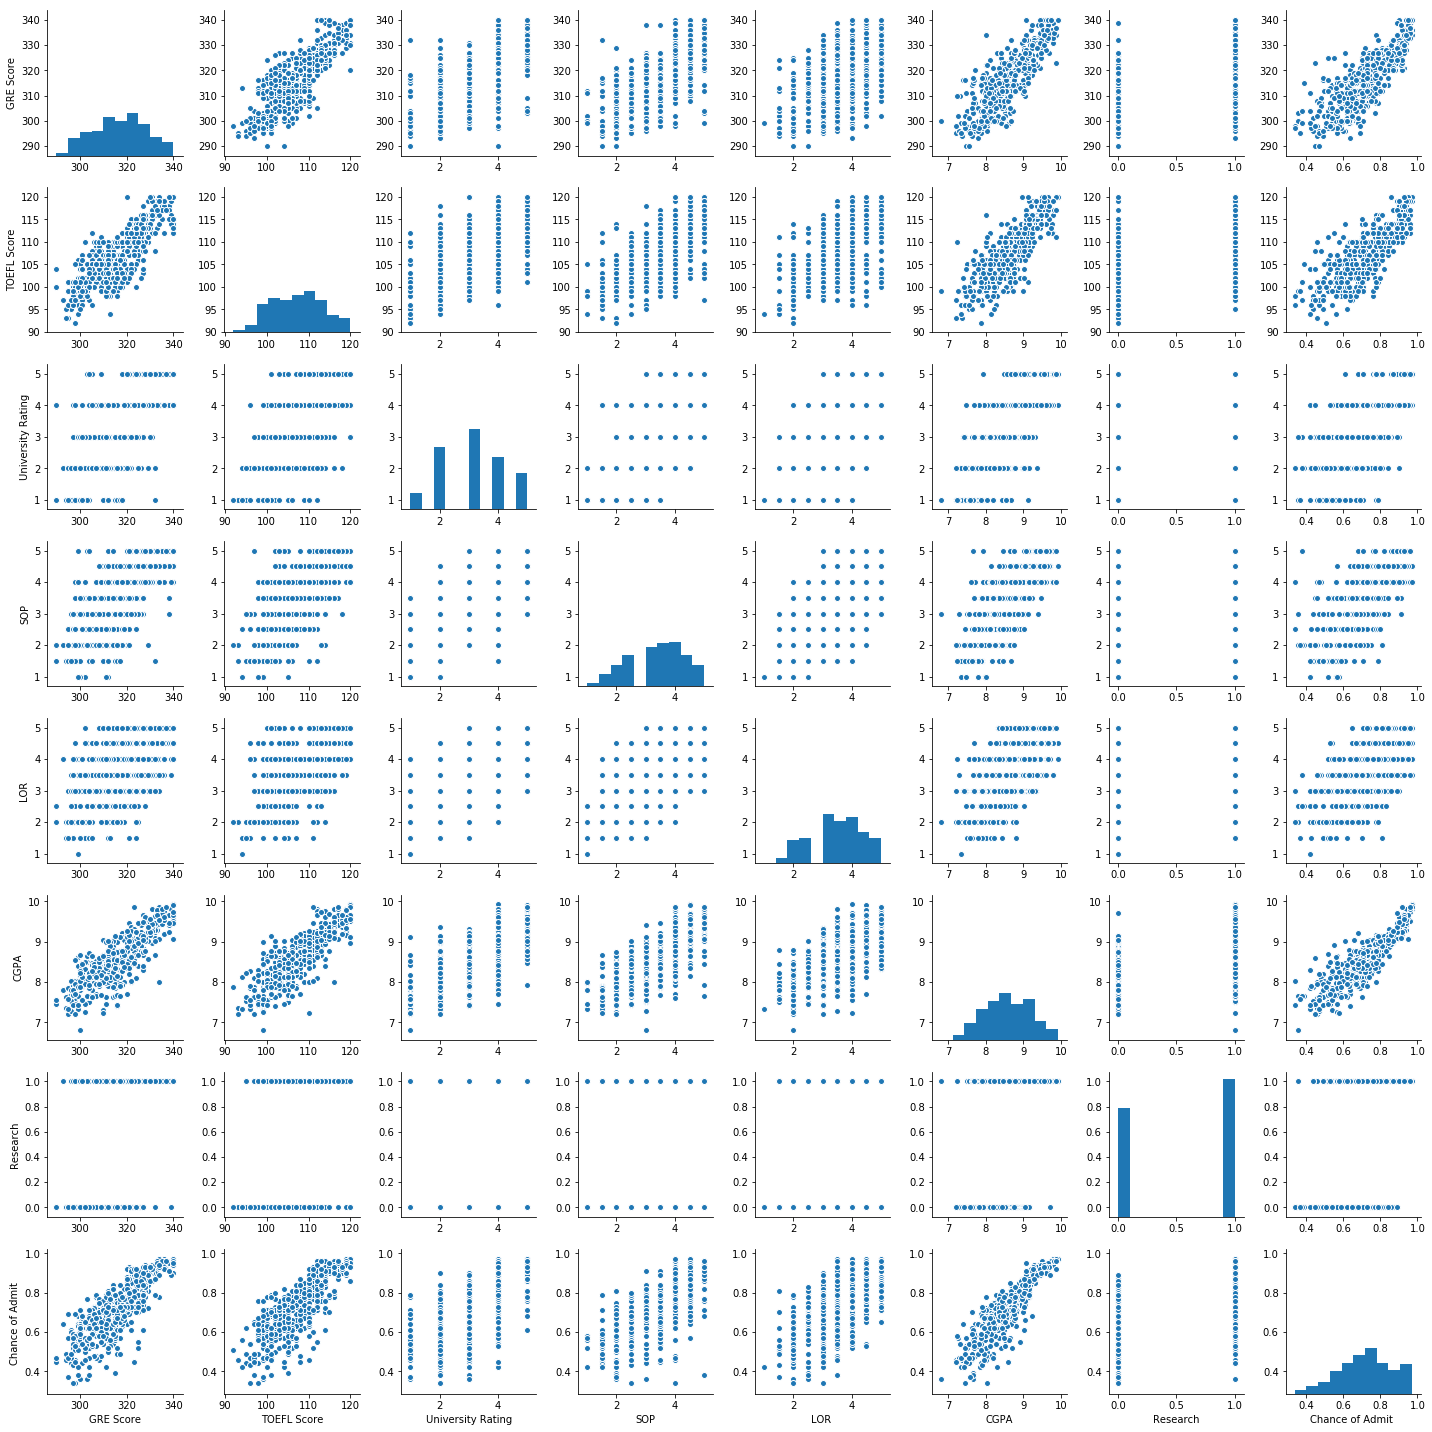

In [13]:
sns.pairplot(df)

In [16]:
# Convert Chance of Admit Column into 0 and 1 as this will be considered as response variable
df.loc[df['Chance of Admit ']>0.75,'Chance of Admit ']=1
df.loc[df['Chance of Admit ']<0.75,'Chance of Admit ']=0
df['Chance of Admit ']=df['Chance of Admit '].astype(np.int64)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [17]:
X = df[['CGPA', 'GRE Score', 'TOEFL Score']].values
Y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
model=DecisionTreeClassifier(max_depth=2,random_state=28)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
from sklearn.metrics import f1_score
f1_score(prediction,y_test)

0.84615384615384603

In [23]:
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [22]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 
  
# making predictions on the testing set 
y_pred = gnb.predict(x_test) 

from sklearn.metrics import f1_score
f1_score(y_pred,y_test)


0.90243902439024393

In [24]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [55]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

# XGBoost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(x_train, y_train)

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rand_forest_reg = RandomForestRegressor()
rand_forest_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
from sklearn.metrics import r2_score
y_pred_lin_reg = reg.predict(x_test)
y_pred_xgb = xgb_reg.predict(x_test)
y_pred_rf = rand_forest_reg.predict(x_test)
print(f"Adjusted R Squared Score for Linear Regression: {r2_score(y_test, y_pred_lin_reg)}")
print(f"Adjusted R Squared Score for XGBoost Regression: {r2_score(y_test, y_pred_xgb)}")
print(f"Adjusted R Squared Score for Random Forest: {r2_score(y_test, y_pred_rf)}")

Adjusted R Squared Score for Linear Regression: 0.793931972283745
Adjusted R Squared Score for XGBoost Regression: 0.7953732817090367
Adjusted R Squared Score for Random Forest: 0.7863236175497884


In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, x_train, y_train, cv = 6)
print(np.char.center("Linear Regression Score", 40, fillchar = '*'))
print("Scores: ", scores)
print("Accuracy: ", scores.mean() * 100, "%")
print("Standard Deviation: +/-", scores.std(), "\n\n")

print(np.char.center("XGBoost Score", 40, fillchar = '*'))
scores = cross_val_score(xgb_reg, x_train, y_train, cv = 6)
print("Scores: ", scores)
print("Accuracy: ", scores.mean() * 100, "%")
print("Standard Deviation: +/-", scores.std(), "\n\n")

print(np.char.center("Random Forest Score", 40, fillchar = '*'))
scores = cross_val_score(rand_forest_reg, x_train, y_train, cv = 6)
print("Scores: ", scores)
print("Accuracy: ", scores.mean() * 100, "%")
print("Standard Deviation: +/-", scores.std())

********Linear Regression Score*********
Scores:  [ 0.80979886  0.78682208  0.83122845  0.80434873  0.78031333  0.79791663]
Accuracy:  80.1738012375 %
Standard Deviation: +/- 0.0165206120444 


*************XGBoost Score**************
Scores:  [ 0.75612411  0.74513114  0.77883497  0.76958831  0.74989079  0.76123381]
Accuracy:  76.0133856612 %
Standard Deviation: +/- 0.0114484949898 


**********Random Forest Score***********
Scores:  [ 0.73466585  0.71498401  0.73891414  0.7251095   0.6717803   0.67918004]
Accuracy:  71.0772306336 %
Standard Deviation: +/- 0.0261553239335


In [58]:
x_train,y_train

(array([[ 1.10598187,  1.28470057,  1.45305289],
        [-0.10040672, -1.68206772, -0.37625547],
        [ 1.05571568,  0.83519023,  0.62154909],
        ..., 
        [-0.05014053,  0.29577781, -0.54255623],
        [-0.95493196, -1.41236151, -1.54036079],
        [ 0.85465091,  0.74528816, -0.04365395]]),
 array([ 0.93,  0.69,  0.88,  0.75,  0.34,  0.71,  0.54,  0.54,  0.9 ,
         0.95,  0.94,  0.7 ,  0.78,  0.57,  0.92,  0.82,  0.69,  0.79,
         0.84,  0.79,  0.65,  0.78,  0.94,  0.72,  0.64,  0.84,  0.62,
         0.52,  0.69,  0.83,  0.72,  0.49,  0.83,  0.39,  0.69,  0.73,
         0.92,  0.49,  0.72,  0.94,  0.62,  0.72,  0.96,  0.57,  0.94,
         0.56,  0.7 ,  0.96,  0.89,  0.83,  0.61,  0.96,  0.76,  0.86,
         0.73,  0.65,  0.42,  0.46,  0.71,  0.67,  0.7 ,  0.75,  0.77,
         0.64,  0.72,  0.64,  0.9 ,  0.64,  0.94,  0.72,  0.56,  0.84,
         0.81,  0.93,  0.89,  0.65,  0.92,  0.82,  0.73,  0.66,  0.8 ,
         0.44,  0.42,  0.63,  0.79,  0.88,  0.93,  

In [62]:
y_pred_lin_reg,y_test

(array([ 0.90560522,  0.55507972,  0.49424068,  0.69013488,  0.71790109,
         0.76492235,  0.5871064 ,  0.49495539,  0.67526323,  0.65531182,
         0.63474523,  0.94091729,  0.84227812,  0.63886797,  0.74481011,
         0.67444069,  0.82918097,  0.60419419,  0.88363939,  0.63873941,
         0.62163652,  0.63871868,  0.59261119,  0.65949588,  0.61605295,
         0.70897081,  0.78463976,  0.67926897,  0.89488295,  0.62783529,
         0.85957088,  0.57826083,  0.73484286,  0.55655537,  0.69197337,
         0.90114304,  0.84413734,  0.56857171,  0.86667423,  0.86205684,
         0.78086564,  0.78415667,  0.66314708,  0.5608185 ,  0.68202714,
         0.71373185,  0.71490301,  0.60496459,  0.66230973,  0.69894253,
         0.66504479,  0.6419099 ,  0.64692595,  0.46483769,  0.94960202,
         0.87870567,  0.85448195,  0.49506084,  0.64126596,  0.97305534,
         0.94053964,  0.89184666,  0.72218496,  0.47389415,  0.8159843 ,
         0.78669239,  0.68977471,  0.60374931,  0.4

In [30]:
df=df.drop(['Date'], axis=1)

ValueError: labels ['Date'] not contained in axis

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7150 entries, 0 to 7149
Data columns (total 4 columns):
Store            7150 non-null int64
Dept             7150 non-null int64
IsHoliday        7150 non-null bool
Weekly_Sales1    7150 non-null object
dtypes: bool(1), int64(2), object(1)
memory usage: 174.6+ KB


In [112]:
non_cat = [f for f in df.columns if df.dtypes[f] != 'object']
cat = [f for f in df.columns if df.dtypes[f] == 'object']


In [113]:
cat


['Weekly_Sales1']

In [114]:
def treat_missing_numeric(df,columns,how = 'mean'):
    '''
    Function to treat missing values in numeric columns
    Required Input - 
        - df = Pandas DataFrame
        - columns = List input of all the columns need to be imputed
        - how = valid values are 'mean', 'mode', 'median','ffill', numeric value
    Expected Output -
        - Pandas dataframe with imputed missing value in mentioned columns
    '''
    if how == 'mean':
        for i in columns:
            print("Filling missing values with mean for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(df.ix[:,i].mean())
            
    elif how == 'mode':
        for i in columns:
            print("Filling missing values with mode for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(df.ix[:,i].mode())
    
    elif how == 'median':
        for i in columns:
            print("Filling missing values with median for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(df.ix[:,i].median())
    
    elif how == 'ffill':
        for i in columns:
            print("Filling missing values with forward fill for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(method ='ffill')
    
    elif type(how) == int or type(how) == float:
        for i in columns:
            print("Filling missing values with {0} for columns - {1}".format(how,i))
            df.ix[:,i] = df.ix[:,i].fillna(how)
    else:
        print("Missing value fill cannot be completed")
    return df

In [115]:
def treat_missing_categorical(df,columns,how = 'mode'):
    '''
    Function to treat missing values in numeric columns
    Required Input - 
        - df = Pandas DataFrame
        - columns = List input of all the columns need to be imputed
        - how = valid values are 'mode', any string or numeric value
    Expected Output -
        - Pandas dataframe with imputed missing value in mentioned columns
    '''
    if how == 'mode':
        for i in columns:
            print("Filling missing values with mode for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(df.ix[:,i].mode()[0])
    elif type(how) == str:
        for i in columns:
            print("Filling missing values with {0} for columns - {1}".format(how,i))
            df.ix[:,i] = df.ix[:,i].fillna(how)
    elif type(how) == int or type(how) == float:
        for i in columns:
            print("Filling missing values with {0} for columns - {1}".format(how,i))
            df.ix[:,i] = df.ix[:,i].fillna(str(how))
    else:
        print("Missing value fill cannot be completed")
    return df

In [116]:
treat_missing_numeric(df,non_cat,how = 'mean')

Filling missing values with mean for columns - Store
Filling missing values with mean for columns - Dept
Filling missing values with mean for columns - IsHoliday


C:\Users\MUKUNDHAN\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Store,Dept,IsHoliday,Weekly_Sales1
0,1,1,False,less_than_27500
1,1,1,True,above_27500
2,1,1,False,above_27500
3,1,1,False,less_than_27500
4,1,1,False,less_than_27500
5,1,1,False,less_than_27500
6,1,1,False,less_than_27500
7,1,1,False,less_than_27500
8,1,1,False,above_27500
9,1,1,False,above_27500


In [117]:
treat_missing_categorical(df,cat,how = 'mode')

Filling missing values with mode for columns - Weekly_Sales1


,Store,Dept,IsHoliday,Weekly_Sales1
0,1,1,False,less_than_27500
1,1,1,True,above_27500
2,1,1,False,above_27500
3,1,1,False,less_than_27500
4,1,1,False,less_than_27500
5,1,1,False,less_than_27500
6,1,1,False,less_than_27500
7,1,1,False,less_than_27500
8,1,1,False,above_27500
9,1,1,False,above_27500


In [118]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[non_cat])
df[non_cat] = std_scale.transform(df[non_cat])


In [119]:
Weekly_Sales1 = ['less_than_27500','above_27500']
df_l = df[df.Weekly_Sales1.isin(Weekly_Sales1)]
df_l.shape

(7150, 4)

In [120]:
df_l.head()

,Store,Dept,IsHoliday,Weekly_Sales1
0,-1.566699,-1.414214,-0.274204,less_than_27500
1,-1.566699,-1.414214,3.646917,above_27500
2,-1.566699,-1.414214,-0.274204,above_27500
3,-1.566699,-1.414214,-0.274204,less_than_27500
4,-1.566699,-1.414214,-0.274204,less_than_27500


In [121]:
df_l.loc[ df_l.Weekly_Sales1 == 'less_than_27500', 'Weekly_Sales1'] = 0
df_l.loc[ df_l.Weekly_Sales1 == 'above_27500', 'Weekly_Sales1'] = 1

In [122]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

for col in cat:
    df_l[col]=labelEnc.fit_transform(df_l[col])
    

df_l.head()


,Store,Dept,IsHoliday,Weekly_Sales1
0,-1.566699,-1.414214,-0.274204,0
1,-1.566699,-1.414214,3.646917,1
2,-1.566699,-1.414214,-0.274204,1
3,-1.566699,-1.414214,-0.274204,0
4,-1.566699,-1.414214,-0.274204,0


In [123]:
X = df_l.copy()
X = X.drop('Weekly_Sales1', axis = 1)
y = df_l['Weekly_Sales1']

In [124]:
def holdout_cv(X,y,size = 0.3, seed = 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state = seed)
    return X_train, X_test, y_train, y_test


In [125]:
X_train, X_test, y_train, y_test = holdout_cv(X, y, size = 0.3, seed = 1)

In [126]:
'''See the dimensions of input and output data set.'''
print('Input Matrix Dimension:  ', X_train.shape)
print('Output Vector Dimension: ', y_train.shape)
print('Test Data Dimension:     ', X_test.shape)

Input Matrix Dimension:   (5005, 3)
Output Vector Dimension:  (5005,)
Test Data Dimension:      (2145, 3)


In [127]:
from sklearn.svm import SVC

In [128]:
### Running SVM
def runSVC(train_X, train_y, test_X, test_y, C=1.0, kernel_choice = 'rbf'):
    model = SVC(C=C, kernel=kernel_choice, probability=True)
    model.fit(train_X, train_y)
    train_preds = model.predict_proba(train_X)[:,1]
    test_preds = model.predict_proba(test_X)[:,1]
    
    test_loss = 0
    
    train_loss = metrics.roc_auc_score(train_y, train_preds)
    test_loss = metrics.roc_auc_score(test_y, test_preds)
    return test_preds, test_loss, model


In [129]:
pred_svm , loss_svm, model_svm = runSVC(X_train, y_train, X_test, y_test)

In [130]:
pred_svm

array([ 0.42,  0.23,  0.23, ...,  0.21,  0.23,  0.53])

In [131]:
for i in range(len(pred_svm)):
    if pred_svm[i] >= 0.5:
       pred_svm[i] = 1
    else:
        pred_svm[i] = 0

In [132]:
pred_svm

array([ 0.,  0.,  0., ...,  0.,  0.,  1.])

In [133]:
from sklearn.metrics import accuracy_score

In [134]:
#pred_test_y_xg
accuracy_score(y_test, pred_svm)

0.73613053613053614

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
### Running Decision Tree
def runDT(train_X, train_y, test_X, test_y, criterion='gini', depth=None, min_split=2, min_leaf=1):
    model = DecisionTreeClassifier(criterion = criterion, max_depth = depth, 
                                   min_samples_split = min_split, min_samples_leaf=min_leaf)
    model.fit(train_X, train_y)
    train_preds = model.predict_proba(train_X)[:,1]
    test_preds = model.predict_proba(test_X)[:,1]
    
    test_loss = 0
    
    train_loss = metrics.roc_auc_score(train_y, train_preds)
    test_loss = metrics.roc_auc_score(test_y, test_preds)
    return test_preds, test_loss, model

In [137]:
test_pred_dt, loss_dt, model_dt = runDT( X_train, y_train, X_test, y_test)

In [138]:
test_pred_dt

array([ 0.15,  0.  ,  0.  , ...,  0.  ,  0.21,  0.  ])

In [139]:
for i in range(len(test_pred_dt)):
    if test_pred_dt[i] >= 0.5:
       test_pred_dt[i] = 1
    else:
        test_pred_dt[i] = 0

In [140]:
accuracy_score(y_test, test_pred_dt)

0.92261072261072263

In [156]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

In [157]:
### Running Random Forest
def runRF(train_X, train_y, test_X, test_y, depth=20, leaf=10):
    model = RandomForestClassifier(
            n_estimators = 1000,
                    max_depth = depth,
                    min_samples_split = 2,
                    min_samples_leaf = leaf,
                    max_features = 'auto',
                    n_jobs = 4,
                    random_state = 0)
    model.fit(train_X, train_y)
    train_preds = model.predict_proba(train_X)[:,1]
    test_preds = model.predict_proba(test_X)[:,1]
    
    test_loss = 0
    
    train_loss = metrics.roc_auc_score(train_y, train_preds)
    test_loss = metrics.roc_auc_score(test_y, test_preds)

    return test_preds, test_loss, model

In [158]:
test_pred_rf, loss_rf, model_rf = runRF( X_train, y_train, X_test, y_test)

In [159]:
for i in range(len(test_pred_rf)):
    if test_pred_rf[i] >= 0.5:
       test_pred_rf[i] = 1
    else:
       test_pred_rf[i] = 0

In [160]:
accuracy_score(y_test, test_pred_rf)

0.91748251748251752

In [147]:
clas = np.array(['less_than_27500','above_27500'])
clas

array(['less_than_27500', 'above_27500'],
      dtype='<U15')

In [149]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred_nb = gnb.predict(X_test)

for i in range(len(y_pred_nb)):
    if y_pred_nb[i] >= 0.5:
           y_pred[i] = 1
    else:
        y_pred_nb[i] = 0
        
accuracy_score(y_test, y_pred_nb)

0.62564102564102564

In [150]:
model = LogisticRegression(random_state=0, solver='newton-cg',multi_class='multinomial')
model.fit(X_train,y_train)

Y_predict_lr = model.predict(X_test)

for i in range(len(Y_predict_lr)):
    if Y_predict_lr[i] >= 0.5:
           Y_predict_lr[i] = 1
    else:
        Y_predict_lr[i] = 0
        
accuracy_score(y_test, Y_predict_lr)

0.63543123543123547

In [151]:
import itertools

In [152]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("dt Normalized confusion matrix")
    else:
        print('dt Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

dt Confusion matrix, without normalization
[[1315   48]
 [ 118  664]]


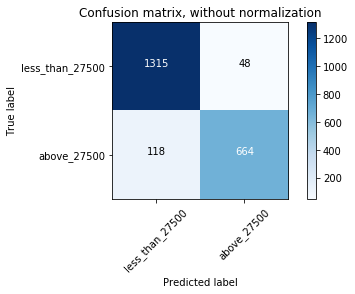

In [153]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, test_pred_dt)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clas,
                      title='Confusion matrix, without normalization')


plt.show()

dt Confusion matrix, without normalization
[[1319   44]
 [ 133  649]]


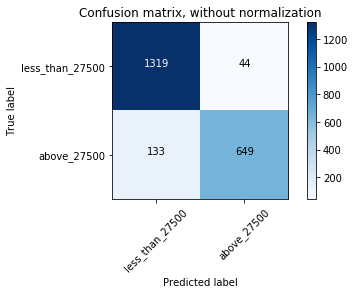

In [154]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, test_pred_rf)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clas,
                      title='Confusion matrix, without normalization')


plt.show()


dt Confusion matrix, without normalization
[[1198  165]
 [ 401  381]]


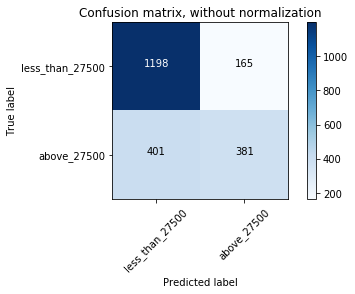

In [155]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_svm)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clas,
                      title='Confusion matrix, without normalization')


plt.show()
